Imports all libraray that are using in the project

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import plotly.express as px
# import plotly.graph_objects as go
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
import numpy as np


In [42]:
#Read csv file
df = pd.read_csv('/Users/admin/Desktop/NewCourseWork_AI/FeatureEngineering/vegetable_prices_with_festivals.csv', na_values=[], keep_default_na=False)


In [43]:
#Checking columns
print(df.columns)


Index(['Commodity', 'Date', 'Unit', 'Minimum', 'Maximum', 'Average', 'Season',
       'Variety', 'Festive_Season'],
      dtype='object')


In [81]:
#Checking cloumn top of the table 
df.head()

,Commodity,Unit,Minimum,Maximum,Average,Season,Variety,Festive_Season,Year,Month,Day
0,123,3,50,60,55.0,Pre-winter,6,NaN,2021,1,5
1,122,3,50,60,55.0,Pre-winter,5,NaN,2021,1,5
2,125,3,30,35,32.5,Pre-winter,43,NaN,2021,1,5
3,127,3,30,35,32.5,Pre-winter,45,NaN,2021,1,5
4,124,2,40,45,42.5,Pre-winter,42,NaN,2021,1,5


In [82]:
#Checking columns buttom of the table
df.tail()

,Commodity,Unit,Minimum,Maximum,Average,Season,Variety,Festive_Season,Year,Month,Day
122026,33,2,Rs 200.00,Rs 220.00,210.0,Autumn,8,NaN,2023,10,1
122027,47,2,Rs 370.00,Rs 400.00,385.0,Autumn,16,NaN,2023,10,1
122028,44,2,Rs 270.00,Rs 300.00,285.0,Autumn,13,NaN,2023,10,1
122029,45,2,Rs 260.00,Rs 300.00,280.0,Autumn,14,NaN,2023,10,1
122030,46,2,Rs 250.00,Rs 300.00,275.0,Autumn,15,NaN,2023,10,1


In [46]:
# Shows summary of the dataset: columns, non-null counts, data types, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122786 entries, 0 to 122785
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Commodity       122786 non-null  object
 1   Date            122786 non-null  object
 2   Unit            122786 non-null  object
 3   Minimum         122786 non-null  object
 4   Maximum         122786 non-null  object
 5   Average         122786 non-null  object
 6   Season          122786 non-null  object
 7   Variety         122786 non-null  object
 8   Festive_Season  122786 non-null  object
dtypes: object(9)
memory usage: 8.4+ MB


In [47]:
# Shows statistical summary of numeric columns
df.describe()

,Commodity,Date,Unit,Minimum,Maximum,Average,Season,Variety,Festive_Season
count,122786,122786,122786,122786,122786,122786,122786,122786,122786
unique,136,291,8,283,293,1232,7,56,4
top,Cauli Local,,KG,Rs 50.00,Rs 80.00,55,Spring,Standard,None
freq,1249,94037,80990,6129,6097,4152,36960,56732,115638


In [48]:
#Checking any null or not in the columns 
df.isnull().sum()


Commodity         0
Date              0
Unit              0
Minimum           0
Maximum           0
Average           0
Season            0
Variety           0
Festive_Season    0
dtype: int64

In [49]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [50]:
#Checking festive season
print(df['Festive_Season'].unique())


['None' 'Dashain' 'Tihar' 'Holi']


In [51]:
# Convert the 'Date' column to datetime format

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [52]:
#Add this to count to know how many rows matched each festival:
print(df['Festive_Season'].value_counts())


Festive_Season
None       115638
Dashain      2495
Tihar        2495
Holi         2158
Name: count, dtype: int64


In [53]:
# Unique values in some key columns
print(df["Commodity"].unique())
print(df["Variety"].unique())
print(df["Season"].unique())
print(df["Festive_Season"].unique())


['Tomato Big(Nepali)' 'Tomato Big(Indian)' 'Tomato Small(Local)'
 'Tomato Small(Tunnel)' 'Tomato Small(Indian)' 'Tomato Small(Terai)'
 'Potato Red' 'Potato Red(Indian)' 'Potato White' 'Onion Dry (Indian)'
 'Carrot(Local)' 'Carrot(Terai)' 'Cabbage(Local)' 'Cabbage(Terai)'
 'Cabbage' 'Cauli Local' 'Cauli Local(Jyapu)' 'Cauli Terai' 'Raddish Red'
 'Raddish White(Local)' 'Raddish White(Hybrid)' 'Brinjal Long'
 'Brinjal Round' 'Green Peas' 'French Bean(Local)' 'French Bean(Hybrid)'
 'Sword Bean' 'Bitter Gourd' 'Bottle Gourd' 'Pumpkin' 'Squash(Long)'
 'Squash(Round)' 'Turnip' 'Okara' 'Sweet Potato' 'Barela' 'Arum'
 'Christophine' 'Brd Leaf Mustard' 'Spinach Leaf' 'Cress Leaf'
 'Mustard Leaf' 'Fenugreek Leaf' 'Onion Green' 'Bakula' 'Yam'
 'Mushroom(Kanya)' 'Mushroom(Button)' 'Brocauli' 'Sugarbeet'
 'Red Cabbbage' 'Lettuce' 'Knolkhol' 'Celery' 'Parseley' 'Fennel Leaf'
 'Mint' 'Turnip A' 'Tamarind' 'Bamboo Shoot' 'Tofu' 'Gundruk'
 'Apple(Jholey)' 'Apple(Fuji)' 'Banana' 'Lime' 'Pomegranate'
 'Gr

In [54]:
df['Average'] = pd.to_numeric(df['Average'], errors='coerce')


In [55]:
print(df['Average'].dtype)
print(df['Average'].isnull().sum())
print(df['Average'].head(10))


float64
77462
0    55.0
1    55.0
2    32.5
3    32.5
4    42.5
5    42.5
6    42.5
7    32.5
8    29.0
9    62.5
Name: Average, dtype: float64


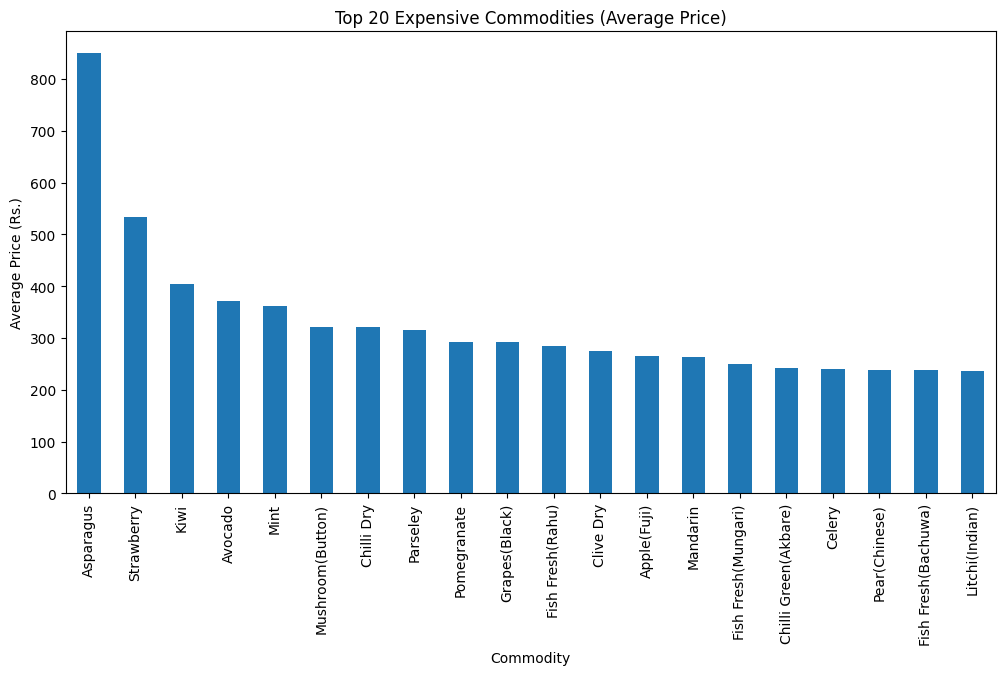

In [56]:
#
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
df.groupby('Commodity')['Average'].mean().sort_values(ascending=False).head(20).plot(kind='bar')
plt.title("Top 20 Expensive Commodities (Average Price)")
plt.ylabel("Average Price (Rs.)")
plt.xticks(rotation=90)
plt.show()


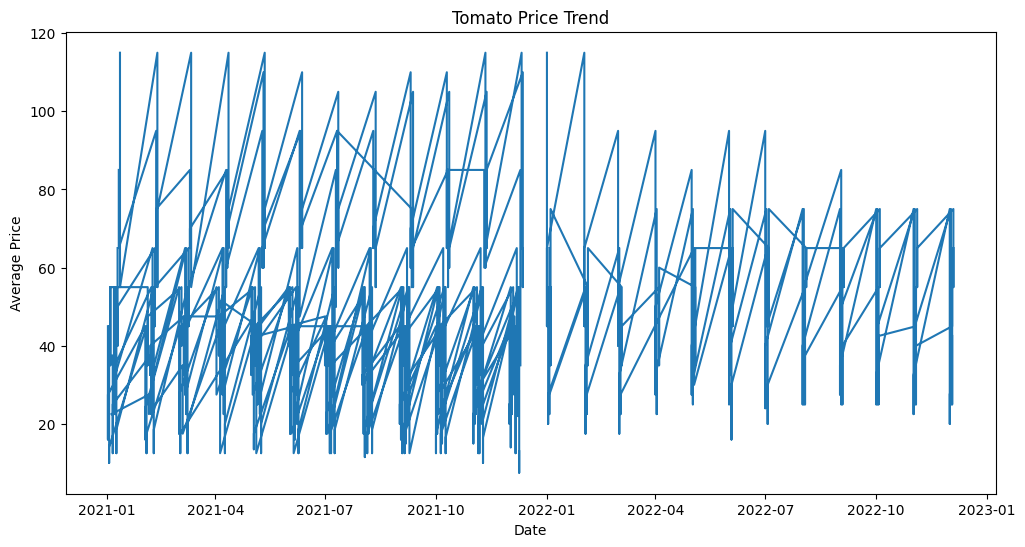

In [57]:
#Price Trend for a Commodity (e.g., Tomato)
tomato_df = df[df['Commodity'].str.contains("Tomato")]
plt.figure(figsize=(12,6))
plt.plot(tomato_df['Date'], tomato_df['Average'])
plt.title("Tomato Price Trend")
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.show()


In [58]:
# These are numeric values, but their dtype is object.
#  I am convert them to numeric types (e.g., float), otherwise numeric operations (mean, median, plots) won’t work.
df['Minimum'] = pd.to_numeric(df['Minimum'], errors='coerce')
df['Maximum'] = pd.to_numeric(df['Maximum'], errors='coerce')
df['Average'] = pd.to_numeric(df['Average'], errors='coerce')


In [59]:
#Applying Normalization
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

# Only normalize the numeric columns
df[['Minimum', 'Maximum', 'Average']] = scaler.fit_transform(df[['Minimum', 'Maximum', 'Average']])


In [60]:
#Checking 
print(df[['Minimum', 'Maximum', 'Average']].head())


    Minimum   Maximum   Average
0  0.017506  0.016722  0.016422
1  0.017506  0.016722  0.016422
2  0.010361  0.008361  0.008643
3  0.010361  0.008361  0.008643
4  0.013934  0.011706  0.012100


#Feature Engineering

In [61]:
# Price range feature
df['Price_Range'] = df['Maximum'] - df['Minimum']

# Price fluctuation ratio
df['Fluctuation'] = (df['Maximum'] - df['Minimum']) / df['Average']

# Extract month from date
df['Month'] = df['Date'].dt.month


In [62]:
print(df.columns)


Index(['Commodity', 'Date', 'Unit', 'Minimum', 'Maximum', 'Average', 'Season',
       'Variety', 'Festive_Season', 'Price_Range', 'Fluctuation', 'Month'],
      dtype='object')


In [63]:
print(df[['Price_Range', 'Fluctuation', 'Month']].head())


   Price_Range  Fluctuation  Month
0    -0.000784    -0.047732    5.0
1    -0.000784    -0.047732    5.0
2    -0.002000    -0.231358    5.0
3    -0.002000    -0.231358    5.0
4    -0.002228    -0.184117    5.0


#One-Hot Encoding

In [64]:
df_encoded = pd.get_dummies(df[['Commodity', 'Variety', 'Season', 'Festive_Season', 'Month','Price_Range', 'Fluctuation']], drop_first=True)
X = df_encoded
y = df['Average']


In [65]:
print(df['Average'].describe())


count    45324.000000
mean         0.039960
std          0.044116
min          0.000000
25%          0.013829
50%          0.026793
75%          0.050994
max          1.000000
Name: Average, dtype: float64


In [66]:
#Fill the null value using fillna
df['Average'] = df['Average'].fillna(df['Average'].median())


In [67]:
print(df['Average'].isna().sum())


0


#Train-Test Split

In [72]:
for col in X.columns:
    if X[col].dtype == 'object':
        print(f"{col} unique values:\n", X[col].unique()[:10])  # Show first 10 unique values


Minimum unique values:
 ['50' '30' '40' '28' '60' '110' '70' '25' '18' '20']
Maximum unique values:
 ['60' '35' '45' '30' '65' '120' '80' '25' '50' '40']
Season unique values:
 ['Pre-winter' 'Winter' 'Spring' 'Summer' 'Rainy' 'Autumn']


In [73]:
# Convert 'Minimum' and 'Maximum' columns to numeric values
df['Minimum'] = pd.to_numeric(df['Minimum'], errors='coerce')
df['Maximum'] = pd.to_numeric(df['Maximum'], errors='coerce')

# Handle any NaN values in these columns if necessary (e.g., fill with mean/median)
df['Minimum'] = df['Minimum'].fillna(df['Minimum'].mean())
df['Maximum'] = df['Maximum'].fillna(df['Maximum'].mean())

# One-hot encode 'Season' column
df_encoded = pd.get_dummies(df['Season'], prefix='Season', drop_first=True)

# Add the encoded 'Season' columns to the original dataframe
df = pd.concat([df, df_encoded], axis=1)

# Print out to check changes
print(df.head())


   Commodity  Unit  Minimum  Maximum  Average      Season  Variety  Year  \
0        123     3     50.0     60.0     55.0  Pre-winter        6  2021   
1        122     3     50.0     60.0     55.0  Pre-winter        5  2021   
2        125     3     30.0     35.0     32.5  Pre-winter       43  2021   
3        127     3     30.0     35.0     32.5  Pre-winter       45  2021   
4        124     2     40.0     45.0     42.5  Pre-winter       42  2021   

   Month  Day  Season_Pre-winter  Season_Rainy  Season_Spring  Season_Summer  \
0      5    1               True         False          False          False   
1      5    1               True         False          False          False   
2      5    1               True         False          False          False   
3      5    1               True         False          False          False   
4      5    1               True         False          False          False   

   Season_Winter  
0          False  
1          False  
2    

In [85]:


# Suppose your dataframe is called df
# X = features, y = target

# Example: Assume target column name is 'Average'
# and your features are all other columns except 'Average'

# Step 1: Separate features and target
y = df['Average'].copy()
X = df.drop(columns=['Average'])

# Step 2: Clean target column (remove 'Rs ' and commas, convert to float)
y = y.replace({'Rs ': '', ',': ''}, regex=True).astype(float)

# Step 3: Identify categorical and numeric columns in X
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=[np.number]).columns

# Step 4: Clean numeric columns if any have 'Rs ' or commas stored as strings
for col in numeric_cols:
    if X[col].dtype == 'object':
        X[col] = X[col].str.replace('Rs ', '').str.replace(',', '').astype(float)

# Step 5: Encode categorical columns using one-hot encoding
X_encoded = pd.get_dummies(X[categorical_cols], drop_first=True)

# Step 6: Combine numeric and encoded categorical columns
X_final = pd.concat([X[numeric_cols], X_encoded], axis=1)

# Optional Step 7: Fill missing values in features (if any)
X_final = X_final.fillna(X_final.median())

# Optional Step 8: Fill missing values in target (y) if necessary
y = y.fillna(y.median())

# Step 9: Create model and KFold cross-validation setup
model = RandomForestRegressor(n_estimators=100, random_state=42)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 10: Run cross-validation scoring using Negative MSE
neg_mse_scores = cross_val_score(model, X_final, y, cv=kfold, scoring='neg_mean_squared_error')

# Step 11: Convert negative MSE to RMSE
rmse_scores = np.sqrt(-neg_mse_scores)

# Step 12: Print RMSE scores
print("RMSE for each fold:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())

# Optional: Evaluate R² scores as well
r2_scores = cross_val_score(model, X_final, y, cv=kfold, scoring='r2')
print("R² score for each fold:", r2_scores)
print("Average R² score:", r2_scores.mean())


RMSE for each fold: [12.42857177 14.89480814 11.60843806 15.76766156 20.59092675]
Average RMSE: 15.058081257162584
R² score for each fold: [0.99004245 0.98529428 0.99097777 0.98344464 0.97434193]
Average R² score: 0.9848202133622175


In [86]:
#Hyperparameter tuning with GridSearchCV

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Split data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Define model
model = RandomForestRegressor(random_state=42)

# Define hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Setup GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit grid search
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV RMSE:", np.sqrt(-grid_search.best_score_))



Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best CV RMSE: 18.395783453843162


In [87]:
# Evaluate on test set
# Best model from grid search
best_model = grid_search.best_estimator_

# Predict on test data
y_pred = best_model.predict(X_test)

# Calculate metrics
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse_test:.3f}")
print(f"Test R²: {r2_test:.3f}")


Test RMSE: 12.942
Test R²: 0.989


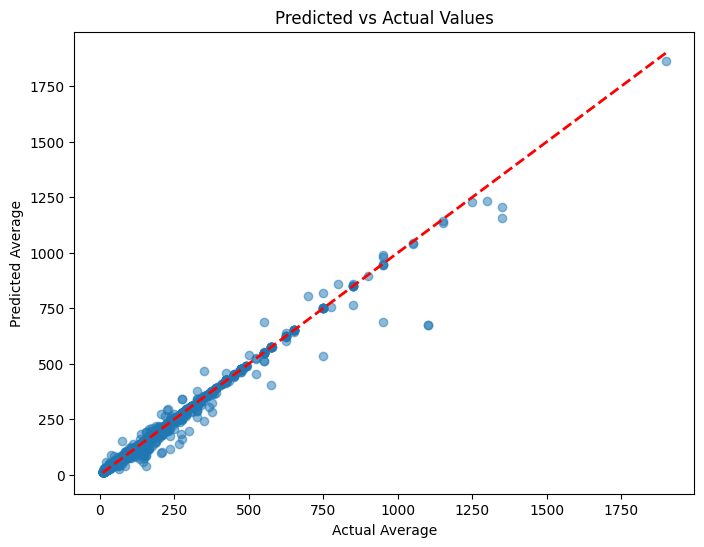

In [88]:
#Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Average')
plt.ylabel('Predicted Average')
plt.title('Predicted vs Actual Values')
plt.show()


In [90]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

rf = grid_search.best_estimator_  # use the best model from grid search

# Assuming rf is your trained RandomForestRegressor
importances = rf.feature_importances_
feature_names = X.columns  # Use your actual feature column names here


# Sort
indices = np.argsort(importances)[::-1]
sorted_features = feature_names[indices]
sorted_importances = importances[indices]


plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), sorted_importances, align="center")
plt.xticks(range(len(importances)), sorted_features, rotation=45, ha='right')
plt.tight_layout()
plt.show()


NameError: name 'rf' is not defined